In [1]:
from pysmiles import read_smiles
import networkx as nx
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
smile1 = 'C1CC[13CH2]CC1C1CCCCC1'
mol = read_smiles(smile1)

# atom vector (C only)
print(mol.nodes(data='element'))
# adjacency matrix
print(nx.to_numpy_matrix(mol, weight='order'))
# one node
print(mol.nodes[0])

[(0, 'C'), (1, 'C'), (2, 'C'), (3, 'C'), (4, 'C'), (5, 'C'), (6, 'C'), (7, 'C'), (8, 'C'), (9, 'C'), (10, 'C'), (11, 'C')]
[[0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]]
{'element': 'C', 'charge': 0, 'aromatic': False, 'hcount': 2}


In [69]:
atom_info = pd.read_csv('raw_data/atom_info.txt',sep=',')
atom_symbol_2_number_dict = atom_info.set_index('Symbol')['AtomicNumber'].to_dict()

In [3]:
sider_smiles = pd.read_csv('sider.csv')

In [4]:
sider_smiles

,smiles,Hepatobiliary disorders,Metabolism and nutrition disorders,Product issues,Eye disorders,Investigations,Musculoskeletal and connective tissue disorders,Gastrointestinal disorders,Social circumstances,Immune system disorders,...,"Congenital, familial and genetic disorders",Infections and infestations,"Respiratory, thoracic and mediastinal disorders",Psychiatric disorders,Renal and urinary disorders,"Pregnancy, puerperium and perinatal conditions",Ear and labyrinth disorders,Cardiac disorders,Nervous system disorders,"Injury, poisoning and procedural complications"
0,C(CNCCNCCNCCN)N,1,1,0,0,1,1,1,0,0,...,0,0,1,1,0,0,1,1,1,0
1,CC(C)(C)C1=CC(=C(C=C1NC(=O)C2=CNC3=CC=CC=C3C2=...,0,1,0,0,1,1,1,0,0,...,0,1,1,0,0,0,1,0,1,0
2,CC[C@]12CC(=C)[C@H]3[C@H]([C@@H]1CC[C@]2(C#C)O...,0,1,0,1,1,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
3,CCC12CC(=C)C3C(C1CC[C@]2(C#C)O)CCC4=CC(=O)CCC34,1,1,0,1,1,1,1,0,1,...,1,1,1,1,1,1,0,0,1,1
4,C1C(C2=CC=CC=C2N(C3=CC=CC=C31)C(=O)N)O,1,1,0,1,1,1,1,0,1,...,0,1,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,C[C@H]1CN(CC[C@@]1(C)C2=CC(=CC=C2)O)C[C@H](CC3...,0,1,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1423,CC[C@@H]1[C@@]2([C@@H]([C@@H](C(=O)[C@@H](C[C@...,1,1,0,1,1,1,1,0,1,...,0,1,1,1,1,0,1,1,1,1
1424,CCOC1=CC=C(C=C1)CC2=C(C=CC(=C2)[C@H]3[C@@H]([C...,1,1,0,0,1,1,1,0,1,...,0,1,0,0,1,0,0,1,1,1
1425,C1CN(CCC1N2C3=CC=CC=C3NC2=O)CCCC(C4=CC=C(C=C4)...,0,1,0,1,1,1,1,0,0,...,0,0,0,1,1,0,0,1,1,1


In [45]:
def get_SMILES_from_name(molecule_name: str) -> str:

    url = f'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{molecule_name}/property/CanonicalSMILES/TXT'
    response = requests.get(url)
    return response.content.decode('UTF-8')[:-1]

mol_name = 'acetate'
get_SMILES_from_name(mol_name)

# SIDER

In [2]:
# Drug Names
drug_names = pd.read_csv('drug_names.tsv', sep='\t', header=None, dtype=str)
drug_names.columns = ['drug_id_flat','drug_name']

# Drug ATC Codes
drug_atc = pd.read_csv('drug_atc.tsv', sep='\t', header=None, dtype=str)
drug_atc.columns = ['drug_id_flat','drug_atc_code']

# Side Effects
side_effect_data = pd.read_csv('meddra_all_se.tsv', sep='\t', header=None, dtype=str)
side_effect_data.columns = ['drug_id_flat','drug_id_stereo','se_ums_id','se_type','repeat_col','se_name']
side_effect_data.loc[:,'se_name'] = side_effect_data.se_name.str.lower()

# combine all data
drug_info = pd.merge(drug_names,drug_atc, on='drug_id_flat')
all_data = pd.merge(drug_info, side_effect_data, on='drug_id_flat')
all_data = all_data.drop('repeat_col',axis=1)

# select only necessary columns and general side effects (PT not LLT)
subset_feature_data = all_data.loc[all_data.se_type=='PT',['drug_name','drug_atc_code','se_name','se_ums_id']]

# remove duplicate side effects for each drug
clean_data = subset_feature_data.drop_duplicates(subset=['drug_atc_code','se_name'])
clean_data = clean_data.drop_duplicates(subset=['drug_atc_code','se_ums_id'])

In [6]:
clean_data

,drug_name,drug_atc_code,se_name,se_ums_id
1,carnitine,A16AA01,abdominal pain,C0000729
3,carnitine,A16AA01,gastrointestinal pain,C0000737
6,carnitine,A16AA01,amblyopia,C0002418
8,carnitine,A16AA01,anaemia,C0002871
10,carnitine,A16AA01,decreased appetite,C0003123
...,...,...,...,...
384990,K779,L03AB05,ageusia,C2364111
384992,K779,L03AB05,somnolence,C2830004
384994,K779,L03AB05,vaginal haemorrhage,C2979982
384997,K779,L03AB05,hypoventilation,C3203358


In [6]:
print('There are {} unique drugs in the data.'.format(len(np.unique(clean_data.drug_atc_code))))
print('There are {} unique side effects in the data.'.format(len(np.unique(clean_data.se_name))))

There are 1560 unique drugs in the data.
There are 3990 unique side effects in the data.


[]

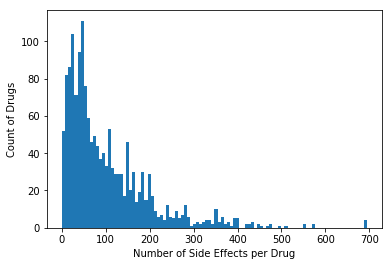

In [186]:
plt.hist(clean_data.groupby('drug_atc_code').se_name.nunique(),100)
plt.xlabel("Number of Side Effects per Drug")
plt.ylabel("Count of Drugs")
plt.plot()

[]

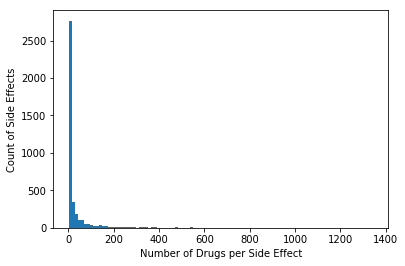

In [188]:
plt.hist(clean_data.groupby('se_name').drug_atc_code.nunique(),100)
plt.xlabel("Number of Drugs per Side Effect")
plt.ylabel("Count of Side Effects")
plt.plot()

In [3]:
threshold = 10
all_side_effects = np.unique(clean_data.se_name.sort_values())
common_side_effects = all_side_effects[clean_data.groupby('se_name').drug_atc_code.nunique()>threshold]
print('There are {} side effects that occur in more than {} different drugs.'.format(len(common_side_effects),threshold))

There are 1442 side effects that occur in more than 10 different drugs.


In [4]:
# filter side effects that don't occur very often
filtered_data = clean_data.loc[[True if side_effect in common_side_effects else False for side_effect in clean_data.se_name],:]
len(np.unique(filtered_data.drug_atc_code))

1558

[]

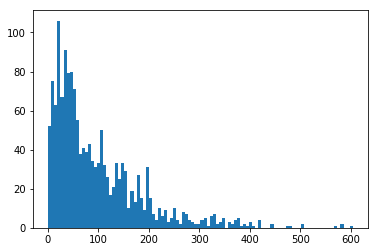

In [184]:
plt.hist(filtered_data.groupby('drug_atc_code').se_name.nunique(),100)
plt.xlabel("Number of Side Effects per Drug")
plt.ylabel("Count of Drugs")
plt.plot()

[]

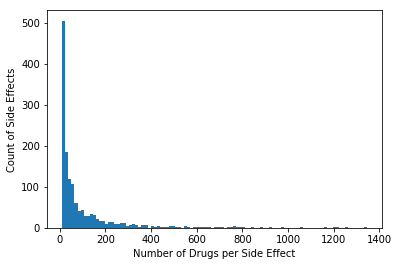

In [189]:
plt.hist(filtered_data.groupby('se_name').drug_atc_code.nunique(),100)
plt.xlabel("Number of Drugs per Side Effect")
plt.ylabel("Count of Side Effects")
plt.plot()

In [191]:
print('Side effects with "sensitivity" in the name:')
print(np.unique([se for se in filtered_data.se_name if 'sensitivity' in se]))
print('\n')
print('Side effects with "pain" in the name:')
print(np.unique([se for se in filtered_data.se_name if 'pain' in se]))

Side effects with "sensitivity" in the name:
['drug hypersensitivity' 'hypersensitivity' 'photosensitivity reaction'
 'type i hypersensitivity' 'type iv hypersensitivity reaction']


Side effects with "pain" in the name:
['abdominal pain' 'abdominal pain lower' 'abdominal pain upper'
 'application site pain' 'back pain' 'bone pain' 'breast pain'
 'chest pain' 'ear pain' 'eye pain' 'facial pain' 'flank pain'
 'gastrointestinal pain' 'gingival pain' 'groin pain' 'infusion site pain'
 'injection site pain' 'instillation site pain' 'laryngeal pain'
 'musculoskeletal chest pain' 'musculoskeletal pain' 'neck pain'
 'non-cardiac chest pain' 'oral pain' 'oropharyngeal pain' 'pain'
 'pain in extremity' 'pain in jaw' 'pain of skin' 'pelvic pain'
 'perineal pain' 'pleuritic pain' 'procedural pain' 'renal pain'
 'testicular pain' 'urethral pain' 'vulvovaginal pain']


In [193]:
filtered_data.loc[filtered_data.drug_atc_code=='A01AB04',:]

,drug_name,drug_atc_code,se_name,se_ums_id
23939,amphotericin,A01AB04,gastrointestinal pain,C0000737
23942,amphotericin,A01AB04,acidosis,C0001122
23944,amphotericin,A01AB04,renal tubular acidosis,C0001126
23947,amphotericin,A01AB04,agranulocytosis,C0001824
23949,amphotericin,A01AB04,albuminuria,C0001925
...,...,...,...,...
24863,amphotericin,A01AB04,hypoalbuminaemia,C0239981
24875,amphotericin,A01AB04,extrasystoles,C0340464
24878,amphotericin,A01AB04,anaphylactoid reaction,C0340865
24910,amphotericin,A01AB04,blood uric acid increased,C0740394


In [54]:
# save data for later
filtered_data.to_csv('processed_data/sider_data.csv')

## Drugbank

In [11]:
all_drugs = []
file_name = 'drugbank_full_database.xml'
small_file = 'small_drugbank.xml'
with open(file_name, "r") as file:

    # convert xml to soup
    soup = BeautifulSoup(file.read(), "xml")

    # loop over each drug
    count = 1
    #test = soup.find_all("name")
    for drug in soup.find_all("drug"):
        
        #print(drug)
        #print(drug.find("atc-codes"))
        if drug.find("atc-codes"):
            
            # extract ATC code
            atc_code = drug.find("atc-codes").find("atc-code").get("code")
            
            # if drug is in SIDER data then find other data and add to record
            if atc_code in list(filtered_data.drug_atc_code):
            
                # extract name
                name = drug.find("name").text.lower()

                # extract DrugBank ID
                db_id = drug.find("drugbank-id", {"primary":"true"}).text

                # combine data in record
                record = {"drug_name": name,
                          "drugbank_id": db_id,
                          "drug_atc_code": atc_code}
                
                # add to full list of drugs
                all_drugs.append(record)

# create dataframe
drugbank_data = pd.DataFrame(all_drugs)

KeyboardInterrupt: 

In [52]:
from lxml import etree as ET
file_name = 'drugbank_full_database.xml'
small_file = 'small_drugbank.xml'
parser = ET.iterparse(small_file)
head = '{http://www.drugbank.ca}'
for _, element in ET.iterparse(small_file):
    #print(element.tag)
    if 'drugbank-id' in element.tag:
        db_id = element.text
        print(db_id)
    if 'atc-codes' in element.tag:
        print(element.text)
    if 'atc-code' in element.tag:
        print('atc no s ', element.text)
    element.clear(keep_tail=True)

DB00001
BTD00024
BIOD00024
atc no s  
      

    
atc no s  
    
DB06605
DB06695
DB01254
DB01609
DB01586
DB02123
DB02659
DB02691
DB03619
DB04348
DB05990
DB06777
DB08833
DB08834
DB08857
DB11622
DB11789
DB09075
DB09053
DB08935
DB06228
DB06206
DB09070
DB00932
DB00013
DB00163
DB09030
DB01381
DB01181
DB00468
DB00908
DB00675
DB00539
DB00686
DB00583
DB00255
DB00269
DB00286
DB00783
DB00977
DB01357
DB04573
DB04574
DB04575
DB07931
DB09317
DB09318
DB09369
DB09381
DB11478
DB11674
DB12487
DB13143
DB13386
DB13418
DB13952
DB13953
DB13954
DB13956
DB15334
DB15335
DB09211
DB00159
DB00244
DB00328
DB00461
DB00465
DB00469
DB00482
DB00500
DB00533
DB00554
DB00573
DB00580
DB00586
DB00605
DB00712
DB00749
DB00784
DB00788
DB00795
DB00812
DB00814
DB00821
DB00861
DB00936
DB00939
DB00991
DB01009
DB01014
DB01250
DB01283
DB01397
DB01399
DB01401
DB01419
DB01424
DB01435
DB01600
DB01628
DB02224
DB03585
DB04552
DB04725
DB04812
DB04817
DB04828
DB05095
DB06725
DB06736
DB06737
DB07402
DB07477
DB08439
DB08797
DB08940
DB089

In [10]:
all_drugs = []
file_name = 'drugbank_full_database.xml'
small_file = 'small_drugbank.xml'
with open(file_name, "r") as file:
    # convert xml to soup
    soup = BeautifulSoup(file.read(), "xml")

KeyboardInterrupt: 

In [ ]:
drugs = soup.find_all("drug")

In [ ]:
# loop over each drug
count = 1

def extract_drug_info(drug_soup, atc_code_list):

    #print(drug)
    #print(drug.find("atc-codes"))
    if drug_soup.find("atc-codes"):

        # extract ATC code
        atc_code = drug_soup.find("atc-codes").find("atc-code").get("code")

        # if drug is in SIDER data then find other data and add to record
        if atc_code in :

            # extract name
            name = drug_soup.find("name").text.lower()

            # extract DrugBank ID
            db_id = drug_soup.find("drugbank-id", {"primary":"true"}).text

            # combine data in record
            record = {"drug_name": name,
                      "drugbank_id": db_id,
                      "drug_atc_code": atc_code}

            # add to full list of drugs
            all_drugs.append(record)
# create dataframe
drugbank_data = pd.DataFrame(all_drugs)

In [ ]:
from multiprocessing.dummy import Pool as ThreadPool

mp = 5
sider_atc_codes = list(filtered_data.drug_atc_code)
pool = ThreadPool(mp)
arguments = zip(drugs,
                repeat(sider_atc_codes))
output = pool.starmap(produce_patches, arguments)
pool.close()
pool.join()

In [10]:
drugbank_data.head()

NameError: name 'drugbank_data' is not defined

In [25]:
len(test)

1102

In [60]:
structure_data = pd.read_csv('data/drugbank_structure.csv')
structure_data = structure_data.loc[:,['DrugBank ID','Name','CAS Number','InChIKey','SMILES','Formula']]
structure_data.head()

,DrugBank ID,Name,CAS Number,InChIKey,SMILES,Formula
0,DB00006,Bivalirudin,128270-60-0,OIRCOABEOLEUMC-GEJPAHFPSA-N,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,C98H138N24O33
1,DB00007,Leuprolide,53714-56-0,GFIJNRVAKGFPGQ-LIJARHBVSA-N,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=...,C59H84N16O12
2,DB00014,Goserelin,65807-02-5,BLCLNMBMMGCOAS-URPVMXJPSA-N,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,C59H84N18O14
3,DB00027,Gramicidin D,1405-97-6,NDAYQJDHGXTBJL-MWWSRJDJSA-N,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...,C96H135N19O16
4,DB00035,Desmopressin,16679-58-6,NFLWUMRGJYTJIN-PNIOQBSNSA-N,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...,C46H64N14O12S2


In [ ]:
from sklearn.preprocessing import LabelEncoder